In [39]:
#import pandas for data manipulation
import pandas as pd
#for numerical computations
import numpy as np
#for creating visualizations
import matplotlib.pyplot as plt 
#for advanced data visualization with more appealing charts
import seaborn as sns

#gives a grid-based design
plt.style.use('ggplot')
#importing Natural Language Toolkit  for text processing tasks like tokenization, stopwords, lemmatization, etc.
import nltk
nltk.download('punkt')
nltk.download('stopwords')  # For stopwords
nltk.download('wordnet')  # For lemmatization
from collections import Counter #for frequency analysis
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\khyati
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\khyati
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\khyati
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\khyati
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
# Read in data
df = pd.read_csv('Reviews.csv')

In [20]:
print(df.shape) #to check no. of rows and columns

(568454, 10)


In [21]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [28]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()


In [29]:
# Remove stopwords and clean the text
stop_words = set(stopwords.words('english'))  # Set of English stopwords
tokenizer = RegexpTokenizer(r'\w+')  # Tokenizer that removes all non-alphanumeric characters


In [30]:
def preprocess_text(text): # to apply this preprocessing to each review text in the Text column
    # Tokenize the text
    tokens = word_tokenize(text)

In [35]:
def preprocess_text(text): # to apply this preprocessing to each review text in the Text column
    # Tokenize the text
    tokens = word_tokenize(text)  
    # Remove stopwords
    tokens_no_stopwords = [word for word in tokens if word.lower() not in stop_words]
    # Remove punctuation and special characters
    tokens_clean = tokenizer.tokenize(' '.join(tokens_no_stopwords))
    # Lemmatization
    tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_clean]
    return ' '.join(tokens_lemmatized)  # Return the cleaned, tokenized, and lemmatized text

In [36]:
# Apply the function to the 'Text' column
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Show the resulting cleaned data
print(df[['Text', 'Cleaned_Text']])

                                                     Text  \
0       I have bought several of the Vitality canned d...   
1       Product arrived labeled as Jumbo Salted Peanut...   
2       This is a confection that has been around a fe...   
3       If you are looking for the secret ingredient i...   
4       Great taffy at a great price.  There was a wid...   
...                                                   ...   
568449  Great for sesame chicken..this is a good if no...   
568450  I'm disappointed with the flavor. The chocolat...   
568451  These stars are small, so you can give 10-15 o...   
568452  These are the BEST treats for training and rew...   
568453  I am very satisfied ,product is as advertised,...   

                                             Cleaned_Text  
0       bought several Vitality canned dog food produc...  
1       Product arrived labeled Jumbo Salted Peanuts p...  
2       confection around century light pillowy citrus...  
3       looking secret ingr

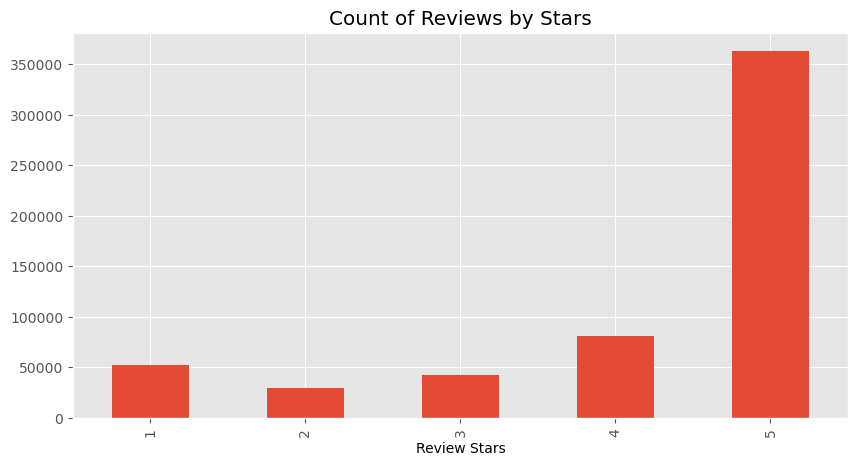

In [37]:
#count the occurrences of each unique value in the 'Score' column,
# sort the result by the index (stars), and plot it as a bar chart.

# get the counts of each unique star rating in the 'Score' column and sort by the index (stars)
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',  # Create a bar chart
          title='Count of Reviews by Stars',  # Set the title of the plot
          figsize=(10, 5))  # Set the figure size (width=10, height=5)

# Set the label for the x-axis (the stars of the review)
ax.set_xlabel('Review Stars')

# Display the plot
plt.show()


In [40]:
# Tokenizing the cleaned text data (you can use the 'Cleaned_Text' column)
all_words = ' '.join(df['Cleaned_Text']).split()  # Join all texts and split into words

#Word Frequency Analysis
word_freq = Counter(all_words)  # Count frequency of each word

# Get the 10 most common words
most_common_words = word_freq.most_common(10)


In [41]:
#plotting a Bar Chart of the Most Frequent Words
# Convert the most common words into two lists (words and their frequencies)
words, frequencies = zip(*most_common_words)


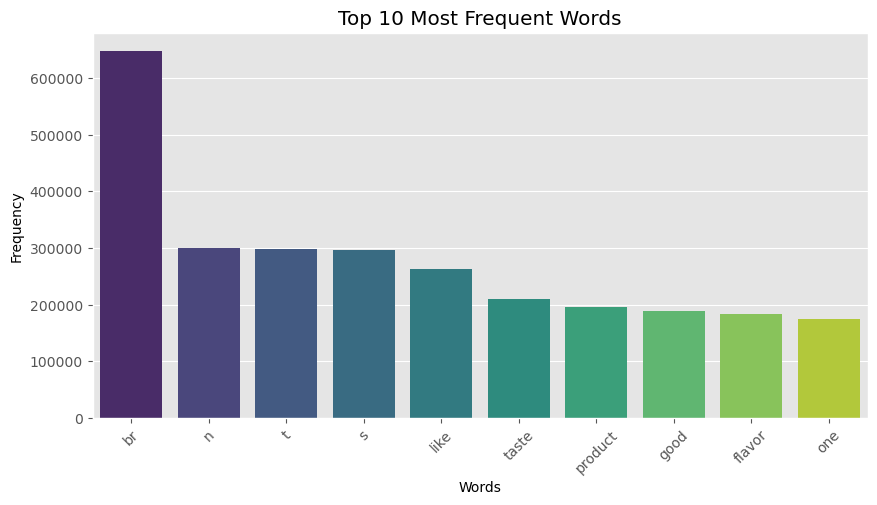

In [42]:
# Plot a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(frequencies), palette='viridis')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#SENTIMENT ANALYSIS (VADER)

In [46]:
nltk.download('vader_lexicon') ## Downloads the VADER lexicon which is required by the SentimentIntensityAnalyzer for sentiment analysis.

[nltk_data] Downloading package vader_lexicon to C:\Users\khyati
[nltk_data]     singh\AppData\Roaming\nltk_data...


True

In [49]:
# Initialize the SentimentIntensityAnalyzer (VADER)
sia = SentimentIntensityAnalyzer()

In [50]:
# function to get sentiment score using VADER
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)  # Get polarity scores
    return sentiment['compound']  # Return the compound score

In [51]:
#appply sentiment analysis on the 'Cleaned_Text' column
df['Sentiment_Score'] = df['Cleaned_Text'].apply(get_sentiment_score)

In [52]:
# Create a new column to classify sentiment based on the compound score
# Sentiment interpretation:
  # Positive sentiment (compound score > 0.05)
  # Neutral sentiment (compound score between -0.05 and 0.05)
  # Negative sentiment (compound score < -0.05)
df['Sentiment'] = df['Sentiment_Score'].apply(lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral'))


In [53]:
# Display the first few rows of the sentiment analysis result
print(df[['Text', 'Sentiment_Score', 'Sentiment']].head())

                                                Text  Sentiment_Score  \
0  I have bought several of the Vitality canned d...           0.9413   
1  Product arrived labeled as Jumbo Salted Peanut...          -0.1027   
2  This is a confection that has been around a fe...           0.8624   
3  If you are looking for the secret ingredient i...           0.4404   
4  Great taffy at a great price.  There was a wid...           0.9468   

  Sentiment  
0  Positive  
1  Negative  
2  Positive  
3  Positive  
4  Positive  


In [55]:
#visualizing the sentiment distribution
# Count the number of positive, negative, and neutral reviews
sentiment_counts = df['Sentiment'].value_counts()


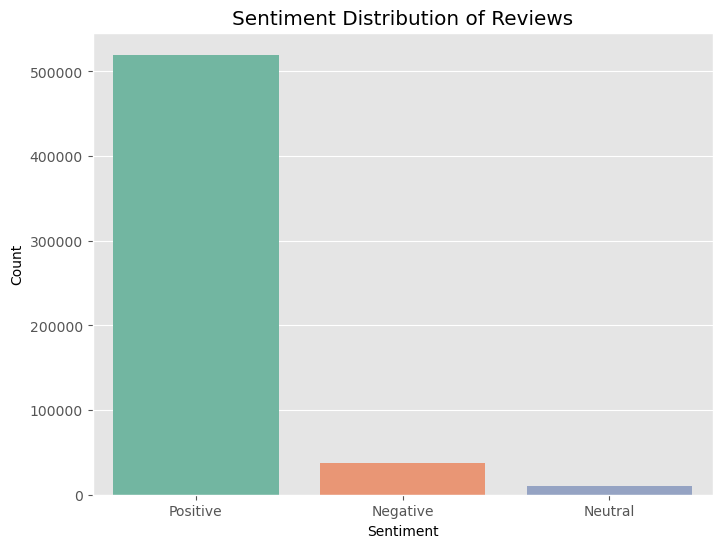

In [56]:
# Plot a bar chart showing the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [57]:
#summary of the sentiment Results
sentiment_summary = sentiment_counts / len(df) * 100  # Calculate percentage of each sentiment
print("\nSentiment Analysis Summary (in percentage):")
print(sentiment_summary)


Sentiment Analysis Summary (in percentage):
Positive    91.428682
Negative     6.693066
Neutral      1.878252
Name: Sentiment, dtype: float64
